In [42]:
import matplotlib.pyplot as plt
import mne
import numpy as np
from scipy.stats import ttest_rel
import scipy.io
from mne.channels import make_standard_montage
from mne import create_info
from mne.io import RawArray
from mne import time_frequency

Opening raw data file E:\Thesis\HybridSpeller\six_flicker\record\vineet_20230426_6_target\vineet_20230426_6_target.fif...
    Range : 0 ... 204183 =      0.000 ...   816.732 secs
Ready.
Reading 0 ... 204183  =      0.000 ...   816.732 secs...
Effective window size : 1.024 (s)
Creating RawArray with float64 data, n_channels=9, n_times=199184


C:\Users\Sunsun\AppData\Local\Temp\ipykernel_1620\1307669159.py:4: RuntimeWarning: This filename (E:\Thesis\HybridSpeller\six_flicker\record\vineet_20230426_6_target\vineet_20230426_6_target.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw =  mne.io.read_raw_fif(fname,  preload = True)
c:\Users\Sunsun\.virtualenvs\HybridSpeller-q8UBACmb\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


    Range : 0 ... 199183 =      0.000 ...   796.732 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 1.50 Hz
- Upper transition bandwidth: 1.50 Hz
- Filter length: 551 samples (2.204 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 77 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 77.00 Hz
- Upper transition bandwidth: 19.25 Hz (-6 dB cutoff frequency: 86.62 Hz)
- Filter length: 413 samples (1.652 sec)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
c:\Users\Sunsun\.virtualenvs\HybridSpeller-q8UBACmb\lib\si

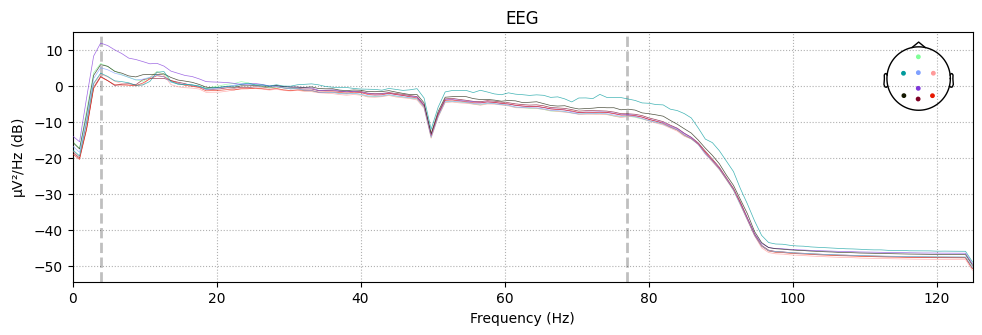

In [43]:
# fname = r"E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230411\sunsun_20230411.fif"
fname = r"E:\Thesis\HybridSpeller\six_flicker\record\vineet_20230426_6_target\vineet_20230426_6_target.fif"
# fname = r"E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230419\sunsun_20230419.fif"
raw =  mne.io.read_raw_fif(fname,  preload = True)
raw.compute_psd().plot()
new_data = raw.get_data()[:,10*250:-10*250]
raw_new = mne.io.RawArray(new_data, raw.info)
raw_new.notch_filter([50,100], trans_bandwidth = 3)
raw_new.filter(4,77)
raw_new.compute_psd().plot()

In [44]:
raw = raw_new

In [45]:
# Load raw data
# data_path = mne.datasets.ssvep.data_path()
# data_path = moabb.datasets.Nakanishi2015.data_path(subject = 1)

# bids_fname = (data_path)

# raw = mne.io.read_raw_brainvision(bids_fname, preload=True, verbose=False)
raw.info['line_freq'] = 60.

# Set montage
# montage = mne.channels.make_standard_montage('standard_1020')
# raw.set_montage(montage, verbose=False)

# Set common average reference
raw.set_eeg_reference('average', projection=False, verbose=False)

# Apply bandpass filter
raw.filter(l_freq=0.1, h_freq=None, fir_design='firwin', verbose=False)

# events, _ = mne.events_from_annotations(raw, verbose=False)
events = mne.find_events(raw, initial_event = True)
tmin, tmax = -1., 5.  # in s
baseline = None
epochs = mne.Epochs(
    raw, events=events,tmin=tmin,
    tmax=tmax, baseline=baseline, verbose=False)

120 events found
Event IDs: [1 2 3 4 5 6]


In [46]:
tmin = 1.
tmax = 5.
fmin = 1.
fmax = 90.
sfreq = epochs.info['sfreq']

spectrum = epochs.compute_psd(
    'welch',
    n_fft=int(sfreq * (tmax - tmin)),
    n_overlap=0, n_per_seg=None,
    tmin=tmin, tmax=tmax,
    fmin=fmin, fmax=fmax,
    window='boxcar',
    verbose=False)
psds, freqs = spectrum.get_data(return_freqs=True)

In [47]:
def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate((
        np.ones(noise_n_neighbor_freqs),
        np.zeros(2 * noise_skip_neighbor_freqs + 1),
        np.ones(noise_n_neighbor_freqs)))
    averaging_kernel /= averaging_kernel.sum()

    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode='valid'),
        axis=-1, arr=psd
    )

    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(
        mean_noise, pad_width=pad_width, constant_values=np.nan
    )

    return psd / mean_noise

In [48]:
snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3,
                    noise_skip_neighbor_freqs=1)

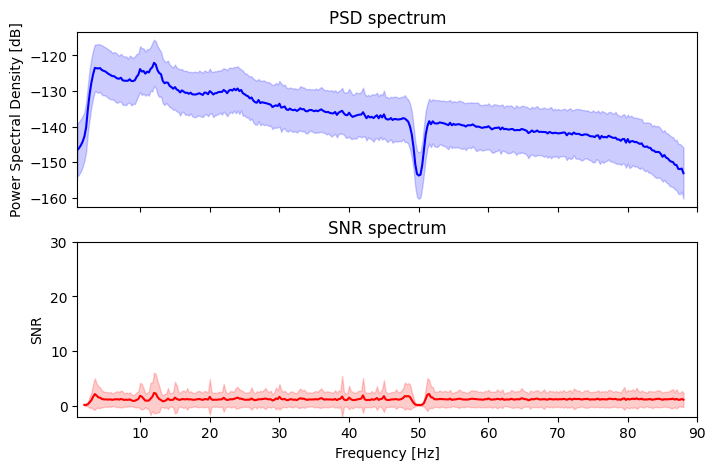

In [49]:
fig, axes = plt.subplots(2, 1, sharex='all', sharey='none', figsize=(8, 5))
freq_range = range(np.where(np.floor(freqs) == 1.)[0][0],
                   np.where(np.ceil(freqs) == fmax - 1)[0][0])

psds_plot = 10 * np.log10(psds)
psds_mean = psds_plot.mean(axis=(0, 1))[freq_range]
psds_std = psds_plot.std(axis=(0, 1))[freq_range]
axes[0].plot(freqs[freq_range], psds_mean, color='b')
axes[0].fill_between(
    freqs[freq_range], psds_mean - psds_std, psds_mean + psds_std,
    color='b', alpha=.2)
axes[0].set(title="PSD spectrum", ylabel='Power Spectral Density [dB]')

# SNR spectrum
snr_mean = snrs.mean(axis=(0, 1))[freq_range]
snr_std = snrs.std(axis=(0, 1))[freq_range]

axes[1].plot(freqs[freq_range], snr_mean, color='r')
axes[1].fill_between(
    freqs[freq_range], snr_mean - snr_std, snr_mean + snr_std,
    color='r', alpha=.2)
axes[1].set(
    title="SNR spectrum", xlabel='Frequency [Hz]',
    ylabel='SNR', ylim=[-2, 30], xlim=[fmin, fmax])
fig

In [50]:
event_id = {
    '10hz': 1,
    '11hz': 2,
    '12hz': 3,
    '13hz': 4,
    '14hz': 5,
    '15hz': 6
}

In [51]:
# Define different ROIs
roi_vis = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']  # visual roi

# Find corresponding indices using mne.pick_types()
picks_roi_vis = mne.pick_types(epochs.info, eeg=True, stim=False, selection=roi_vis)

i_trial_10hz = np.where(epochs.events[:, 2] == event_id['10hz'])[0]
i_trial_11hz = np.where(epochs.events[:, 2] == event_id['11hz'])[0]
i_trial_12hz = np.where(epochs.events[:, 2] == event_id['12hz'])[0]
i_trial_13hz = np.where(epochs.events[:, 2] == event_id['13hz'])[0]
i_trial_14hz = np.where(epochs.events[:, 2] == event_id['14hz'])[0]
i_trial_15hz = np.where(epochs.events[:, 2] == event_id['15hz'])[0]



In [52]:
epochs.info

<Info | 12 non-empty values
 bads: []
 ch_names: Fz, C3, Cz, C4, Pz, PO7, Oz, PO8, STIM MARKERS
 chs: 8 EEG, 1 Stimulus
 custom_ref_applied: True
 dig: 11 items (3 Cardinal, 8 EEG)
 file_id: 4 items (dict)
 highpass: 4.0 Hz
 line_freq: 60.0
 lowpass: 77.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 9
 projs: []
 sfreq: 250.0 Hz
>

In [53]:
picks_roi_vis

array([1, 3, 5, 7])

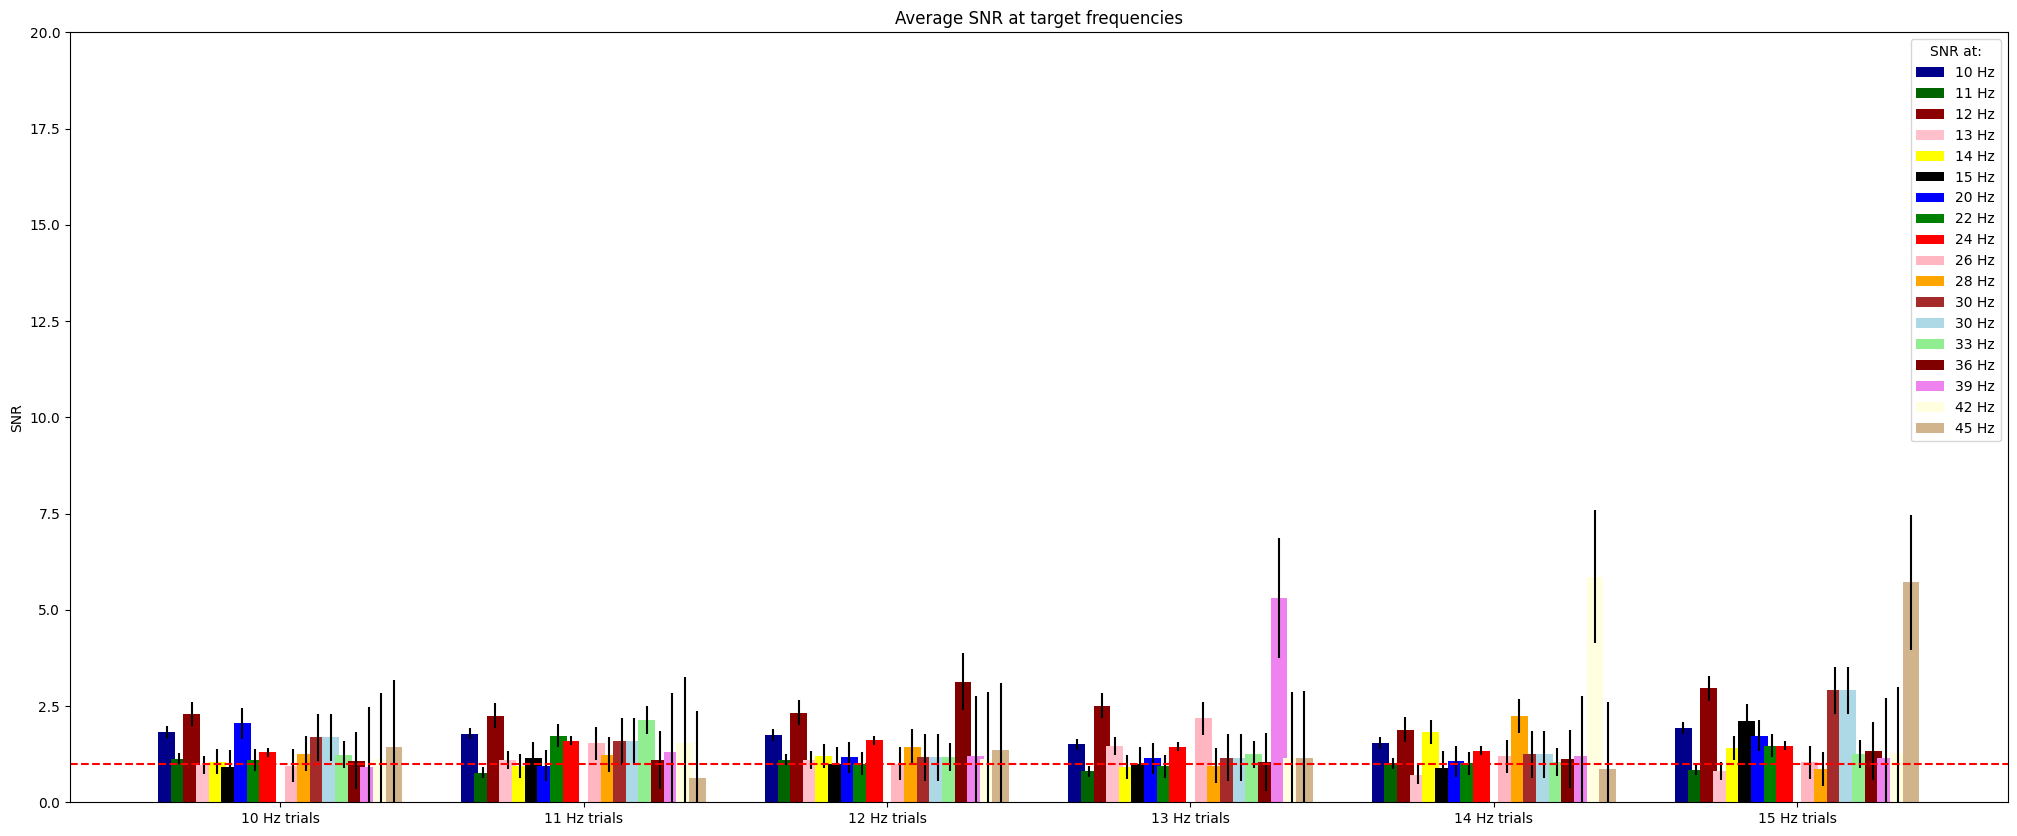

In [68]:
plt.rcParams["figure.figsize"] = (25,10)
snrs_roi = snrs[:, picks_roi_vis, :].mean(axis=1)

freq_plot = [10, 11, 12, 13, 14, 15, 20, 22, 24, 26, 28, 30, 30, 33, 36, 39, 42, 45]
color_plot = [
    'darkblue', 'darkgreen','darkred', 'pink','yellow','black', 'blue', 'green','red', 'lightpink', 'orange', 'brown', 'lightblue', 'lightgreen','maroon','violet','lightyellow', 'tan' 
]
# xpos_plot = [ -17./12, -15./12, -13./12, -11./12, -9./12, -7./12, -5. / 12, -3. / 12,  -1. / 12, 1. / 12,  3. / 12,  5. / 12, 7./12, 9./12, 11./12, 13./12, 15./12, 17./12]
xpos_plot = [ -4.5 /12, -4 /12, -3.5 /12, -3 /12, -2.5 /12, -2. /12, -1.5 / 12, -1. / 12,  -0.5 / 12, 0.5 / 12,  1. / 12,  1.5 / 12, 2./12, 2.5/12, 3./12, 3.5/12, 4./12, 4.5/12]

fig, ax = plt.subplots()
labels = ['10 Hz trials','11 Hz trials', '12 Hz trials','13 Hz trials', '14 Hz trials', '15 Hz trials']
x = np.arange(len(labels))  # the label locations
width = 1  # the width of the bars
res = dict()

# loop to plot SNRs at stimulation frequencies and harmonics
for i, f in enumerate(freq_plot):
    # extract snrs
    stim_10hz_tmp = \
        snrs_roi[i_trial_10hz, np.argmin(abs(freqs - f))]
    stim_11hz_tmp = \
        snrs_roi[i_trial_11hz, np.argmin(abs(freqs - f))]
    stim_12hz_tmp = \
        snrs_roi[i_trial_12hz, np.argmin(abs(freqs - f))]
    stim_13hz_tmp = \
        snrs_roi[i_trial_13hz, np.argmin(abs(freqs - f))]
    stim_14hz_tmp = \
        snrs_roi[i_trial_14hz, np.argmin(abs(freqs - f))]
    stim_15hz_tmp = \
        snrs_roi[i_trial_15hz, np.argmin(abs(freqs - f))]
    SNR_tmp = [stim_10hz_tmp.mean(), stim_11hz_tmp.mean(), stim_12hz_tmp.mean(), stim_13hz_tmp.mean(), stim_14hz_tmp.mean(), stim_15hz_tmp.mean()]
    # plot (with std)
    ax.bar(
        x + width * xpos_plot[i], SNR_tmp, width / len(freq_plot),
        yerr=np.std(SNR_tmp),
        label='%i Hz SNR' % f, color=color_plot[i])
    # store results for statistical comparison
    res['stim_10hz_snrs_%ihz' % f] = stim_10hz_tmp
    res['stim_11hz_snrs_%ihz' % f] = stim_11hz_tmp
    res['stim_12hz_snrs_%ihz' % f] = stim_12hz_tmp
    res['stim_13hz_snrs_%ihz' % f] = stim_13hz_tmp
    res['stim_14hz_snrs_%ihz' % f] = stim_14hz_tmp
    res['stim_15hz_snrs_%ihz' % f] = stim_15hz_tmp

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SNR')
ax.set_title('Average SNR at target frequencies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(['%i Hz' % f for f in freq_plot], title='SNR at:')
ax.set_ylim([0, 20])
ax.axhline(1, ls='--', c='r')
# fig.show()
fig

In [69]:
data = epochs.get_data()[:, :-1, :]
print(data.shape)

Using data from preloaded Raw for 120 events and 1501 original time points ...
(120, 8, 1501)


In [71]:
stft_data = []
for i in range(data.shape[0]):
    stft = time_frequency.stft(data[i], wsize=252, verbose=False); 
    stft_data.append(np.expand_dims(stft, axis=0))
stft_data = np.concatenate(stft_data, axis=0)
stft_data.shape

(120, 8, 127, 12)

(20, 8, 127, 12)
(45, 12)


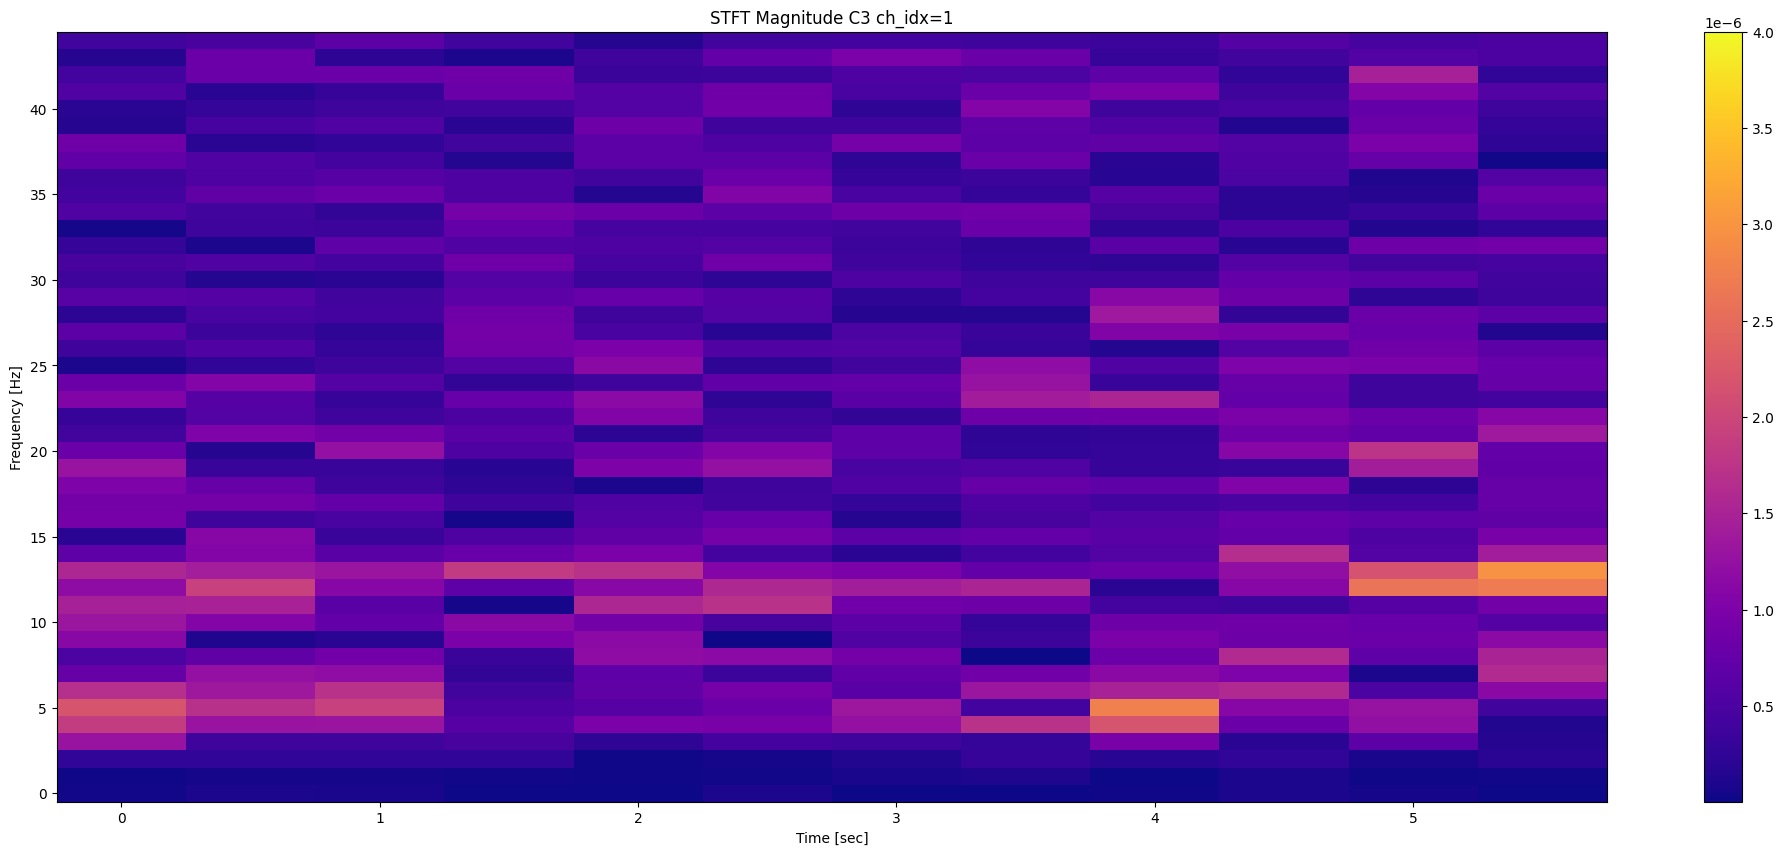

(20, 8, 127, 12)
(45, 12)


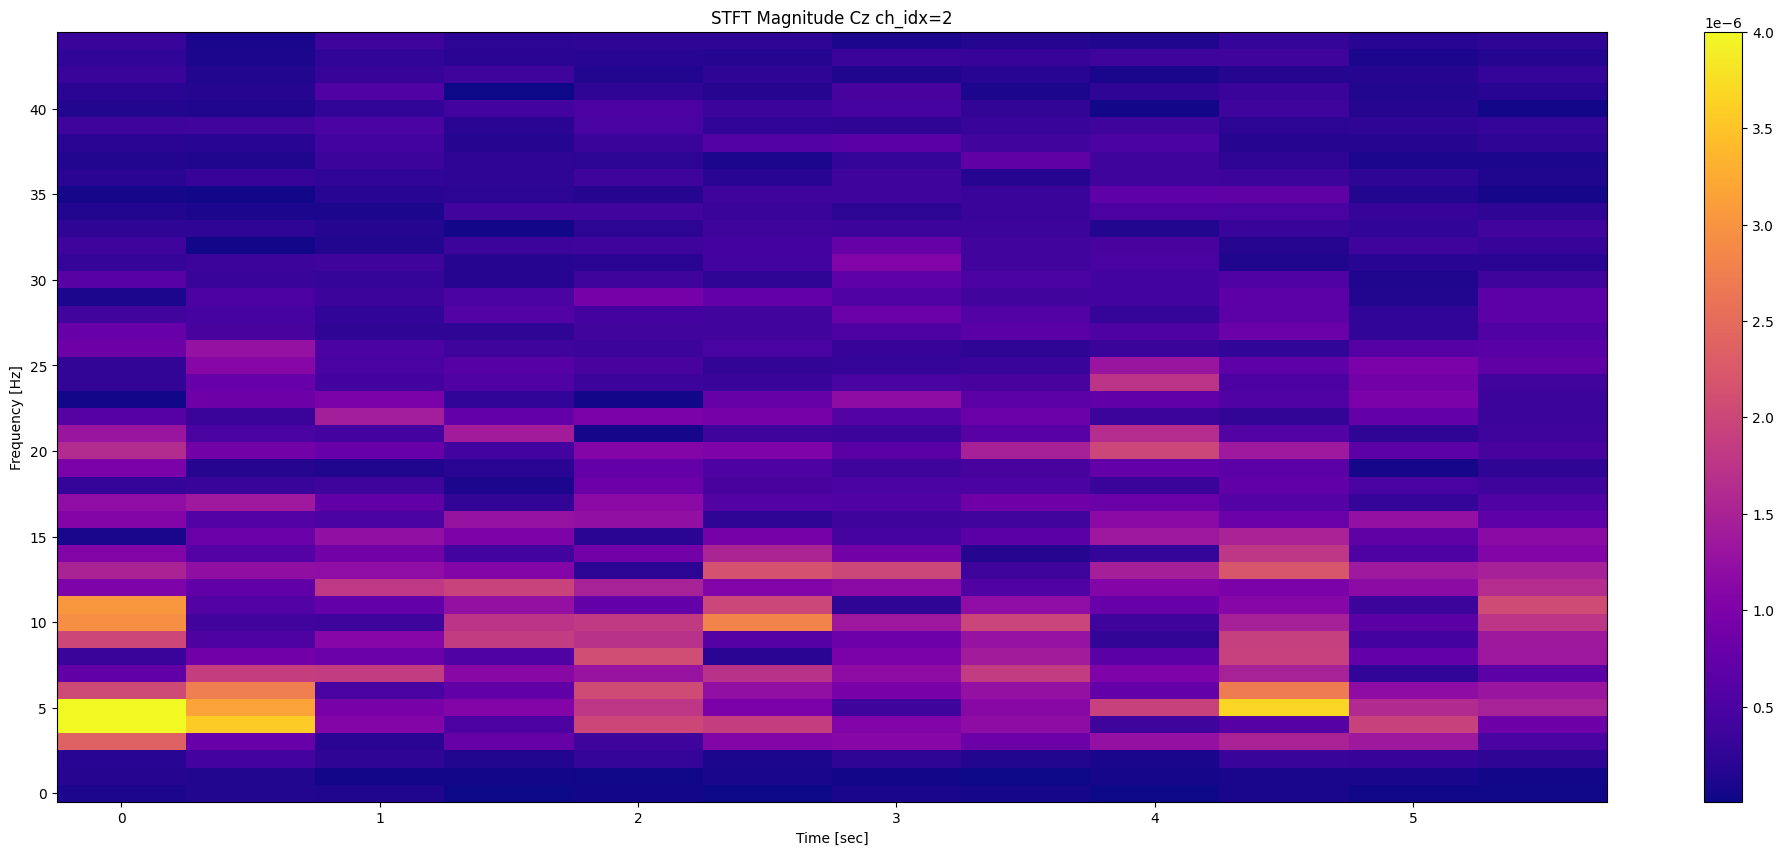

(20, 8, 127, 12)
(45, 12)


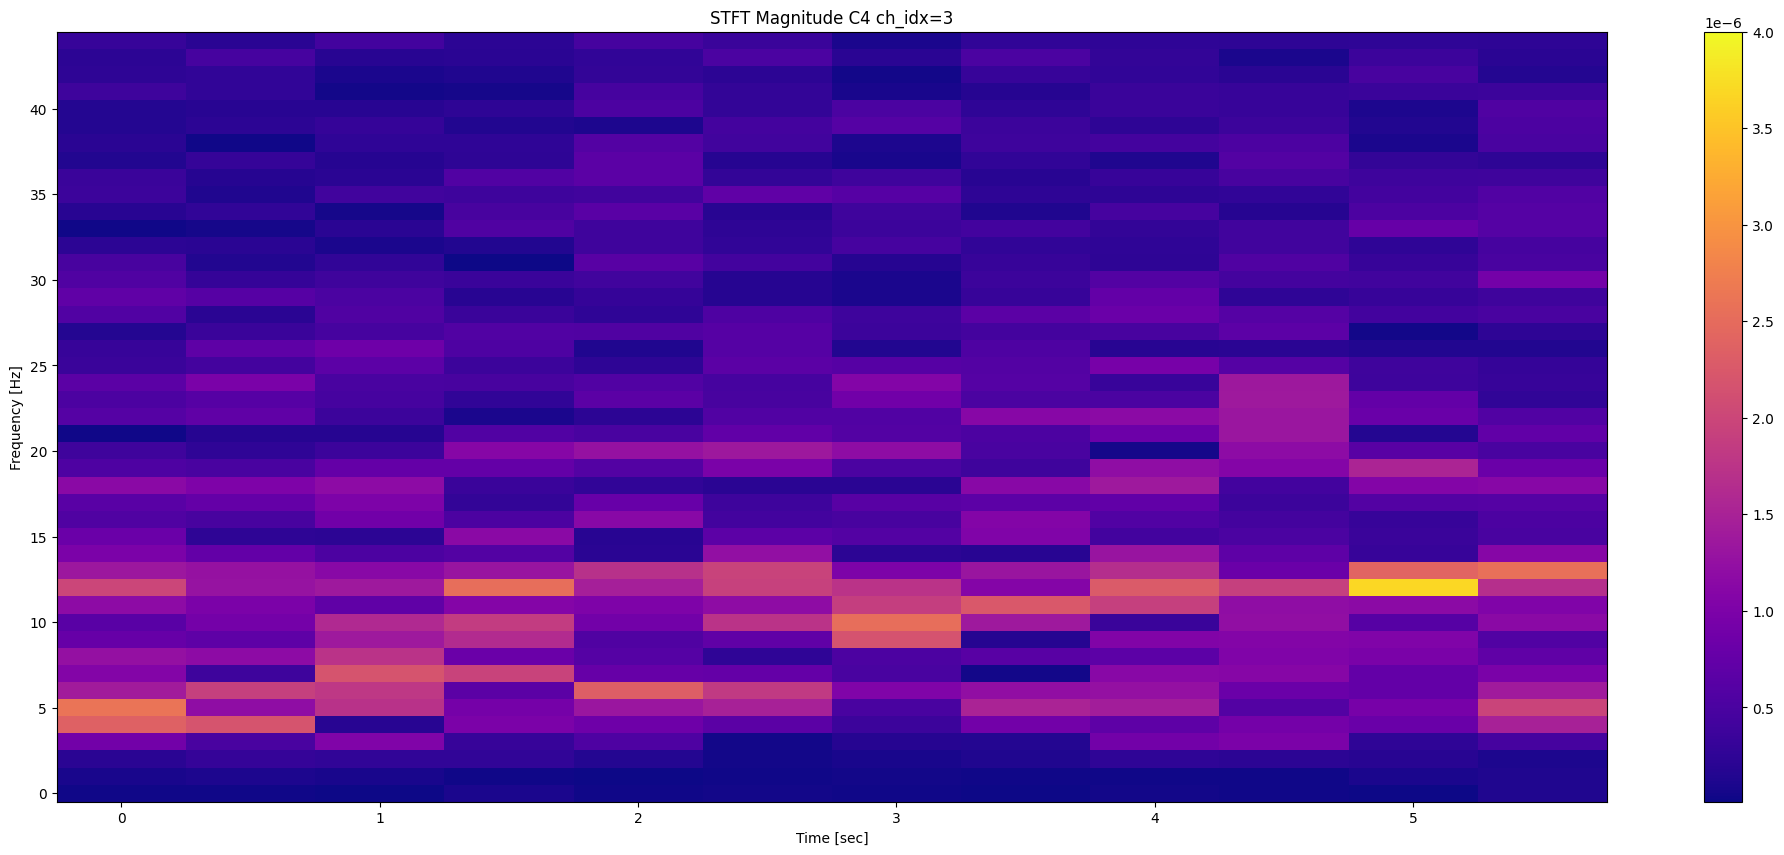

(20, 8, 127, 12)
(45, 12)


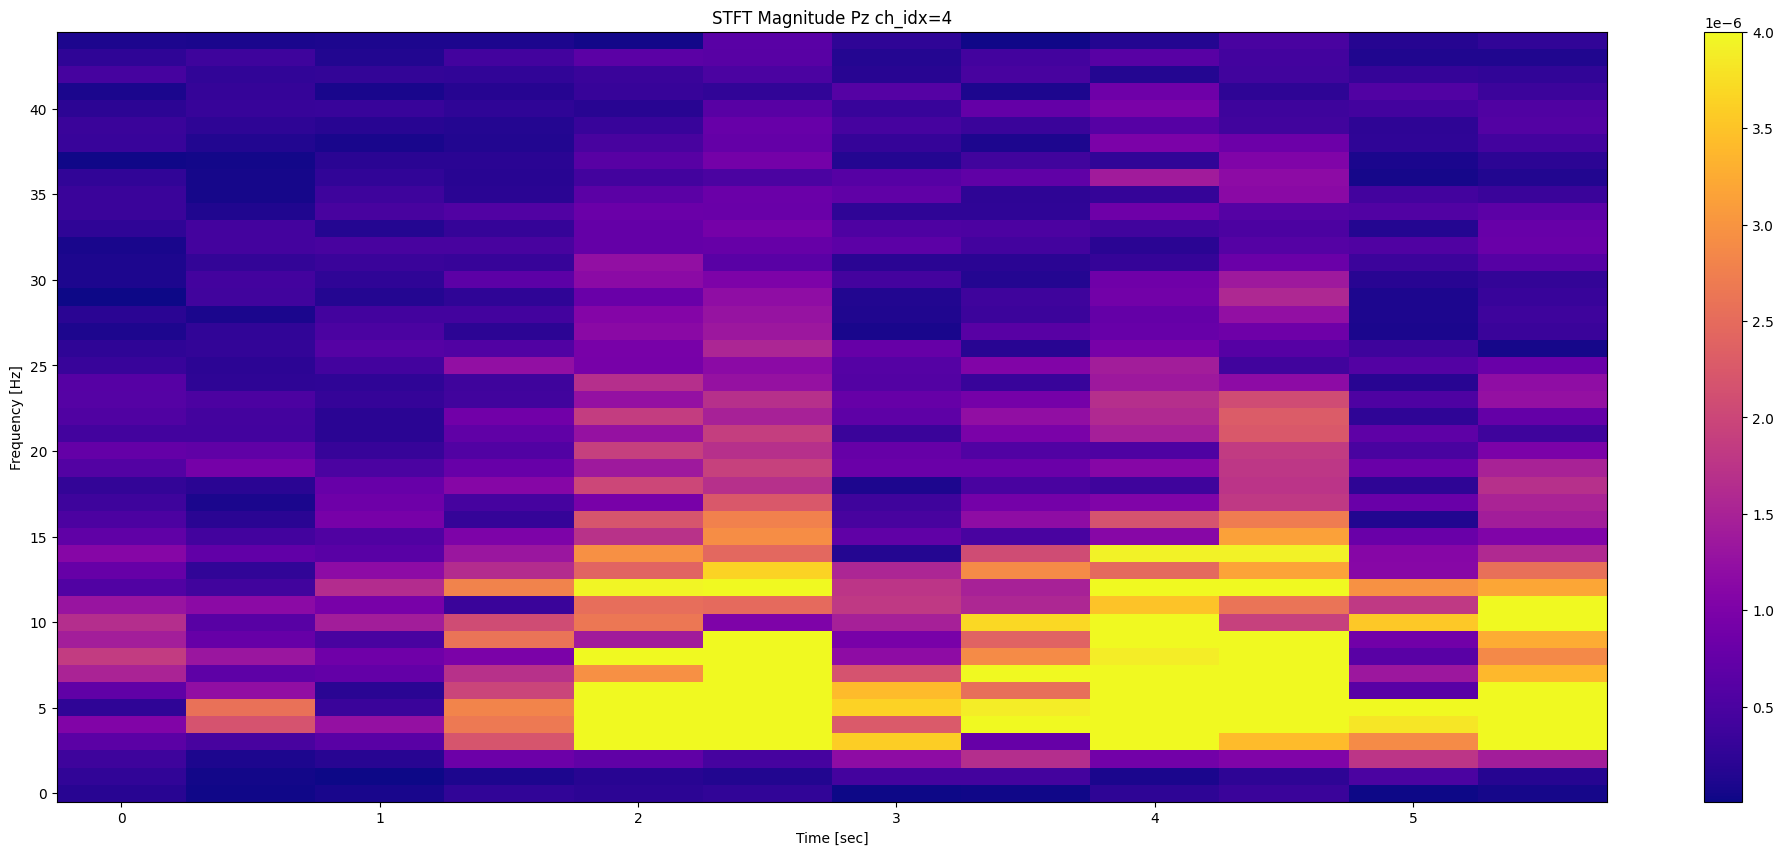

(20, 8, 127, 12)
(45, 12)


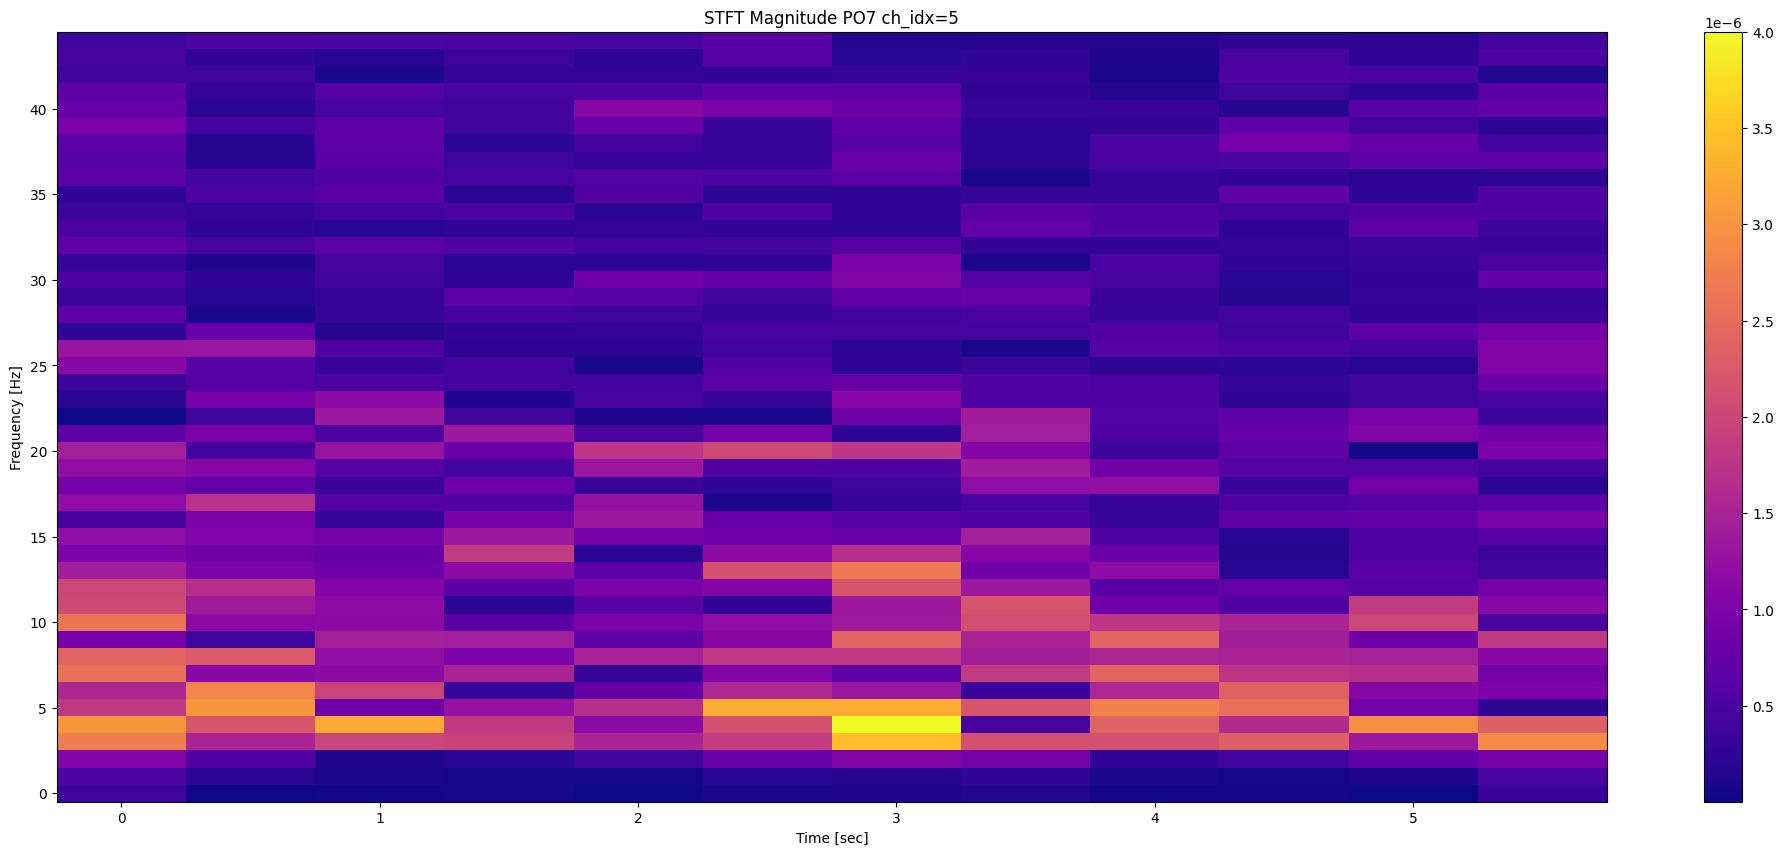

(20, 8, 127, 12)
(45, 12)


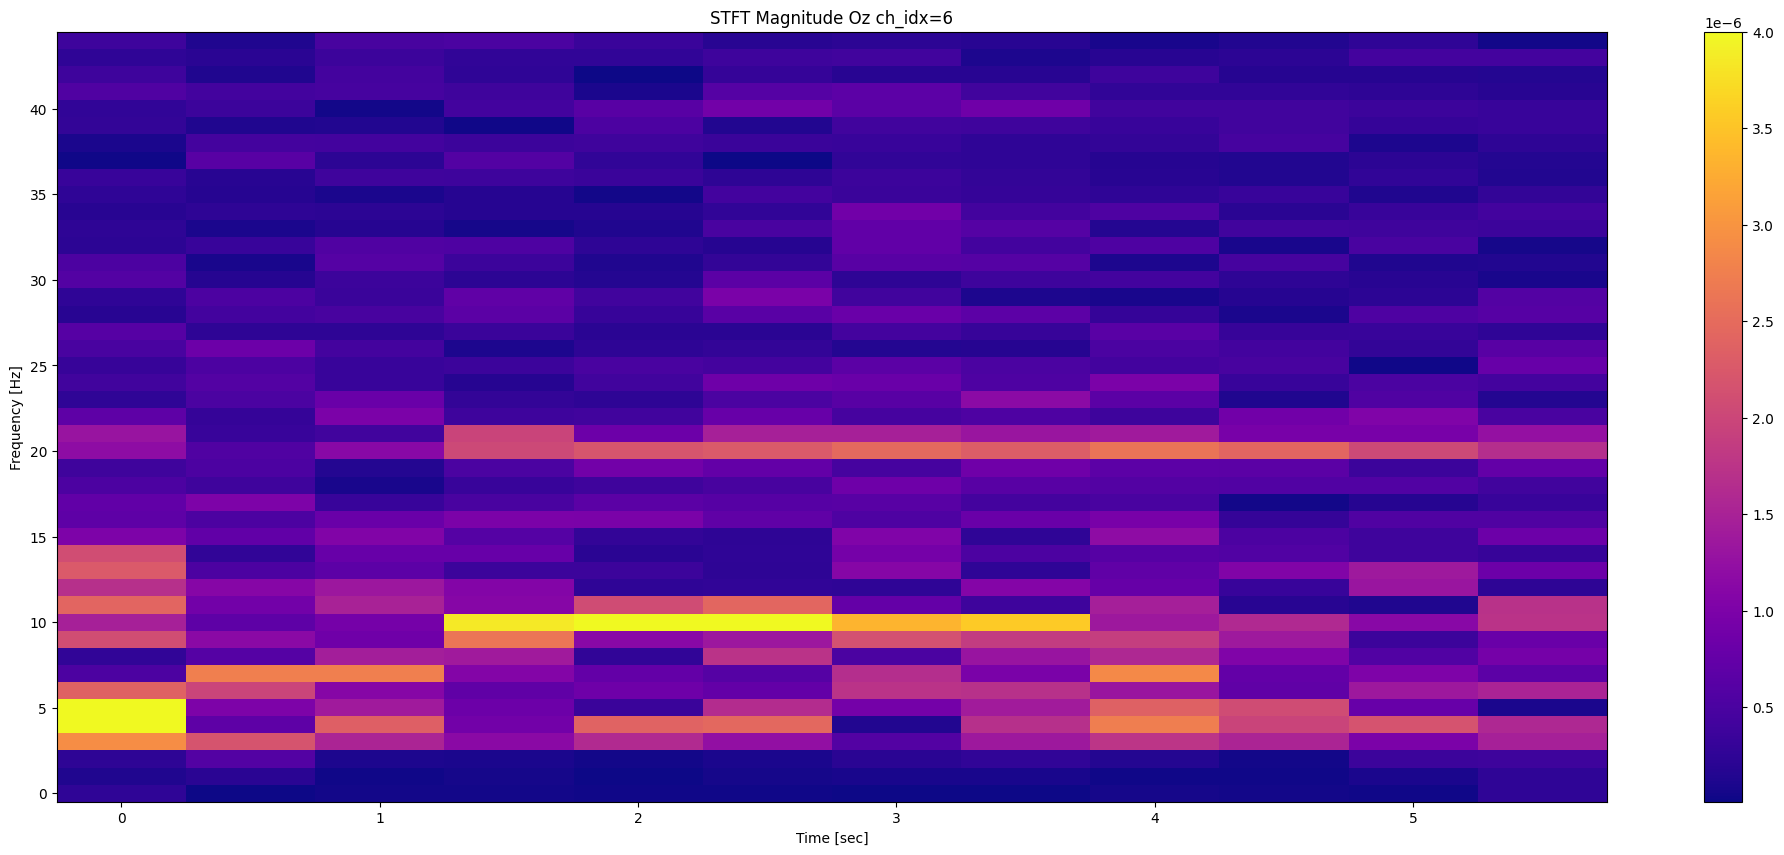

(20, 8, 127, 12)
(45, 12)


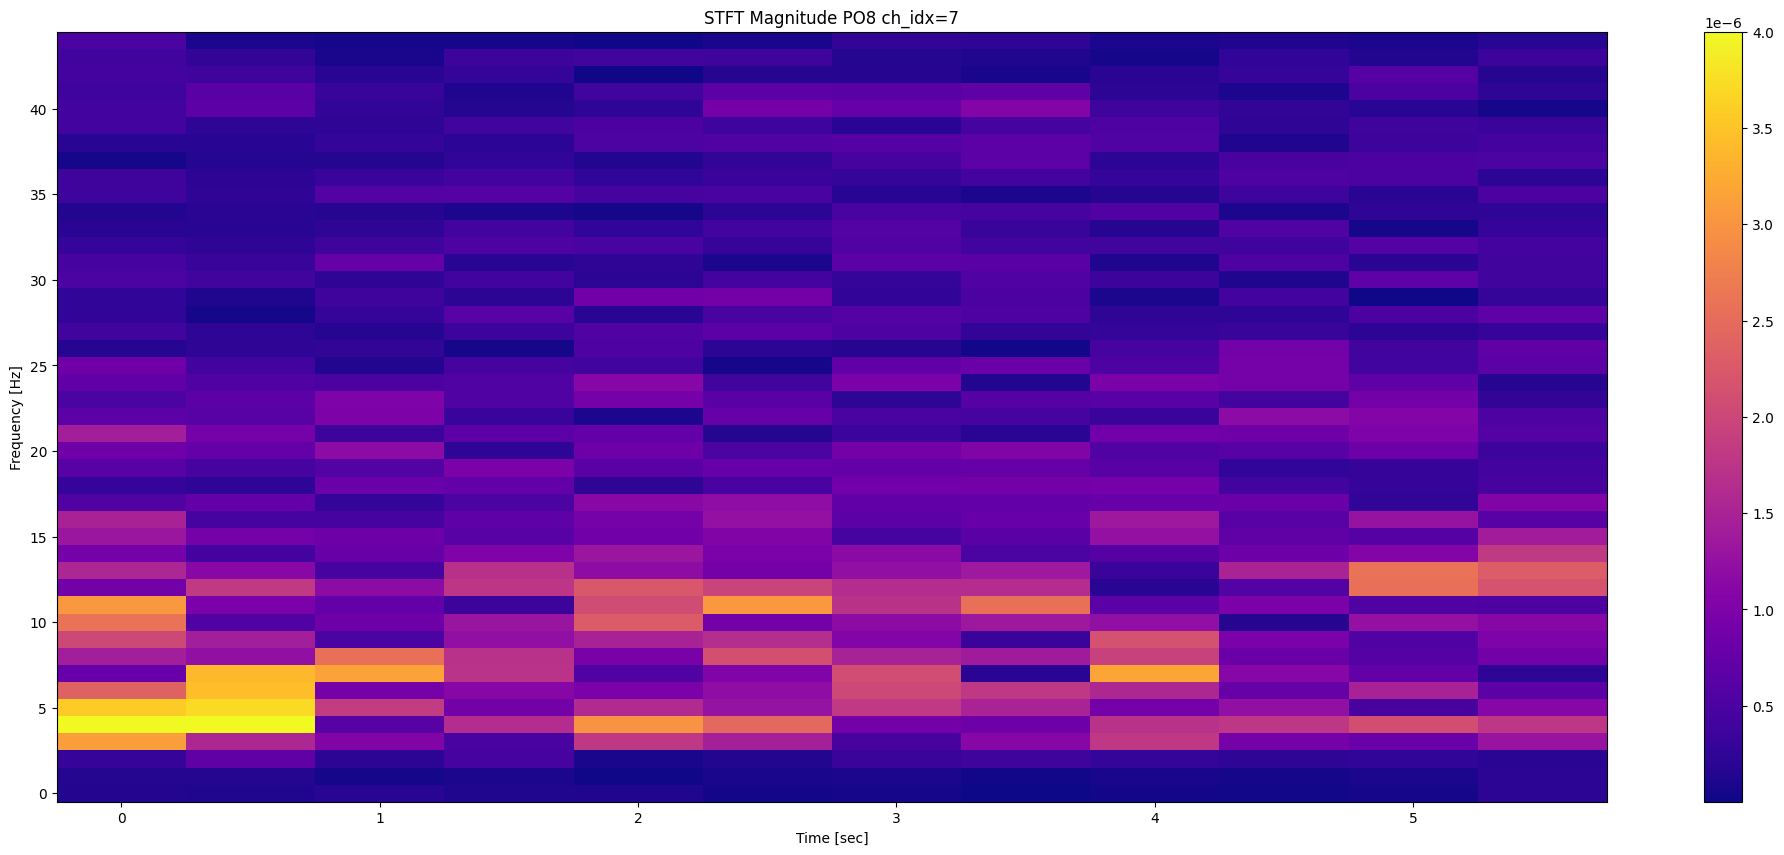

In [73]:
for ch_idx in range(1,8):
    X = stft_data[i_trial_10hz]
    X = X[:20]
    print(X.shape)
    # X = abs(X)
    X = X.mean(axis=0)
    X = X[ch_idx]
    X = X[:45,:]
    print(X.shape)

    c = plt.pcolormesh(np.arange(0,(X.shape[1]) //2,0.5), range(X.shape[0]), np.abs(X), cmap='plasma', vmax=4e-6)
    plt.colorbar(c)
    plt.title(f'STFT Magnitude {raw.ch_names[ch_idx]} {ch_idx=}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

In [74]:
single_epoch_data = epochs[4].get_data()[:, :-1, :]

stft_data = []
for i in range(single_epoch_data.shape[0]):
    stft = time_frequency.stft(single_epoch_data[i], wsize=252, verbose=False); 
    stft_data.append(np.expand_dims(stft, axis=0))
stft_data = np.concatenate(stft_data, axis=0)
stft_data.shape

Using data from preloaded Raw for 1 events and 1501 original time points ...


(1, 8, 127, 12)

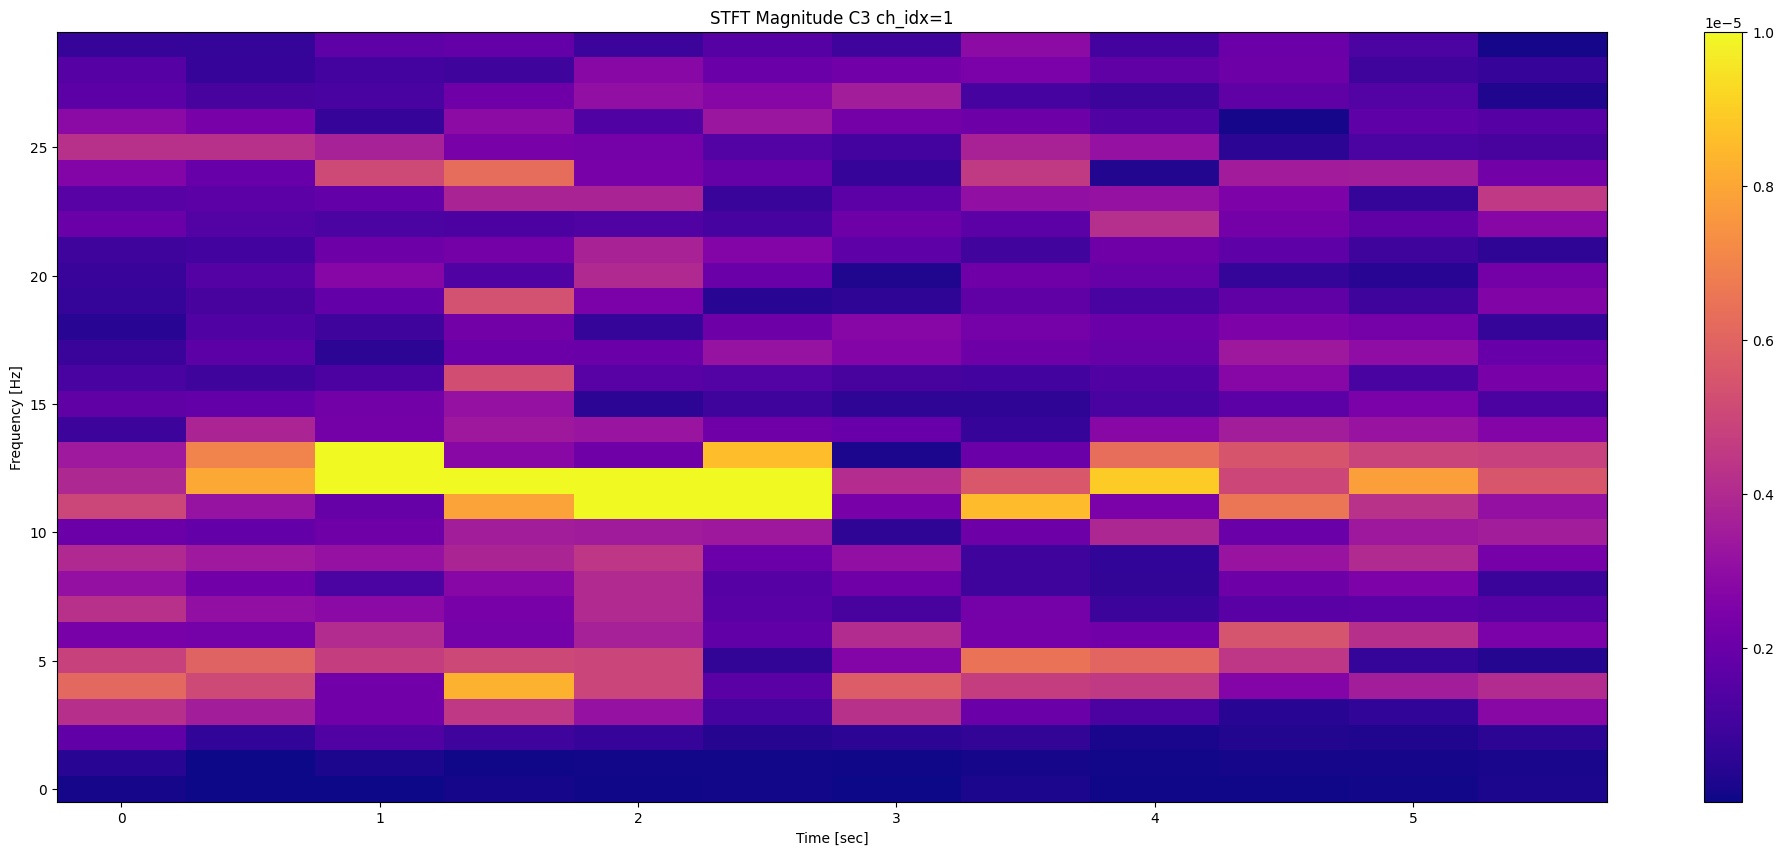

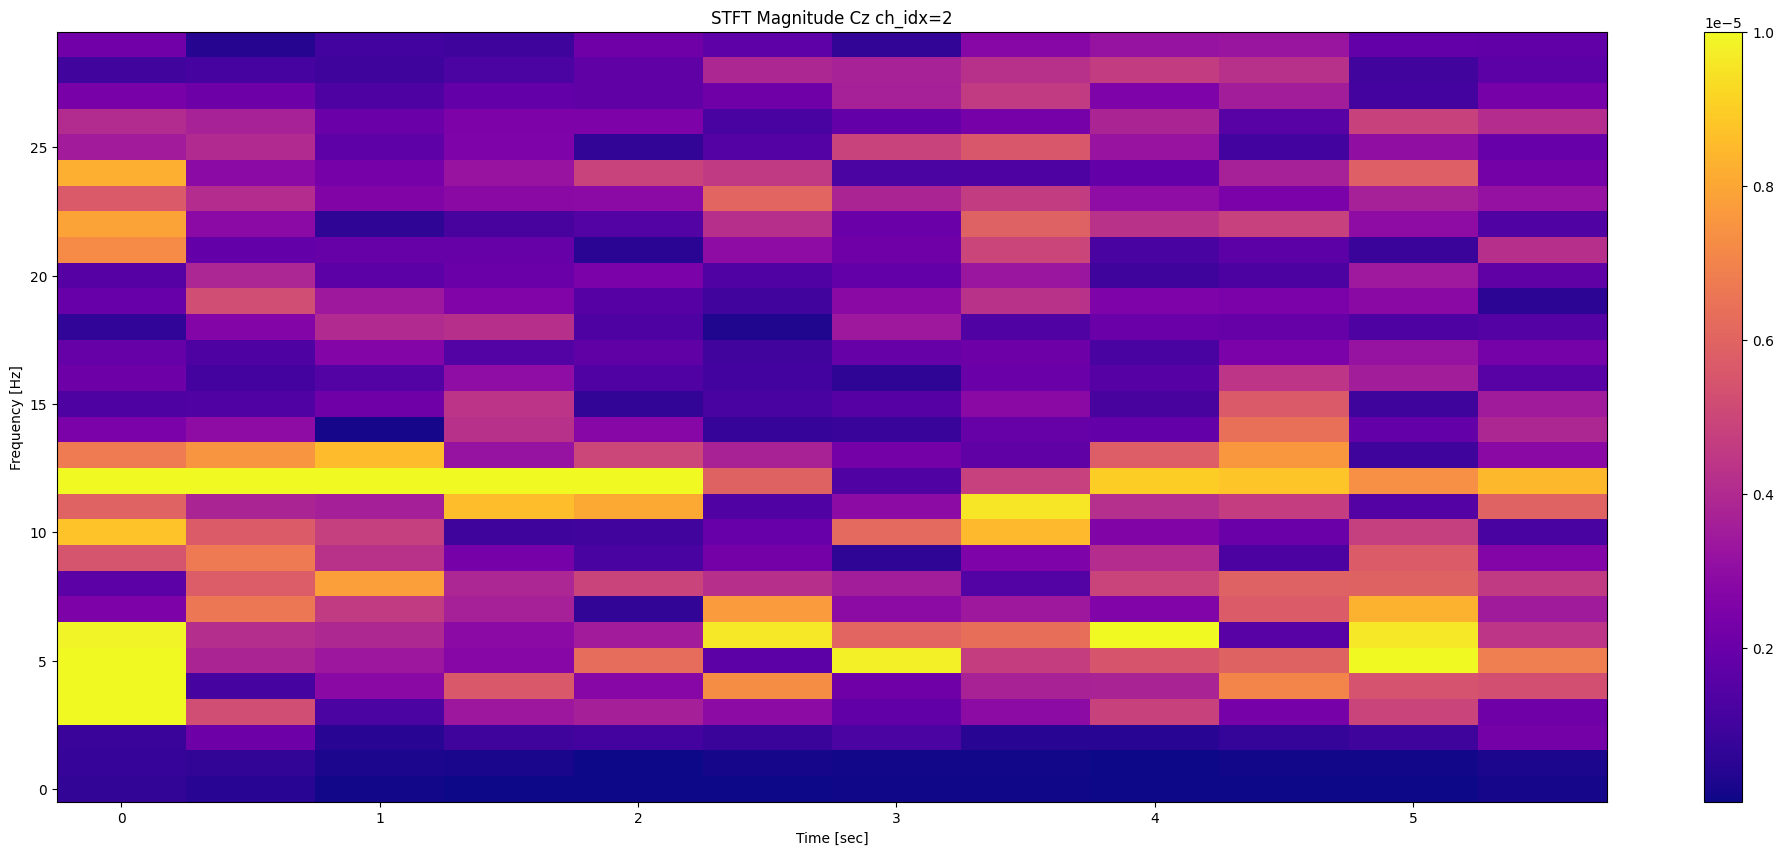

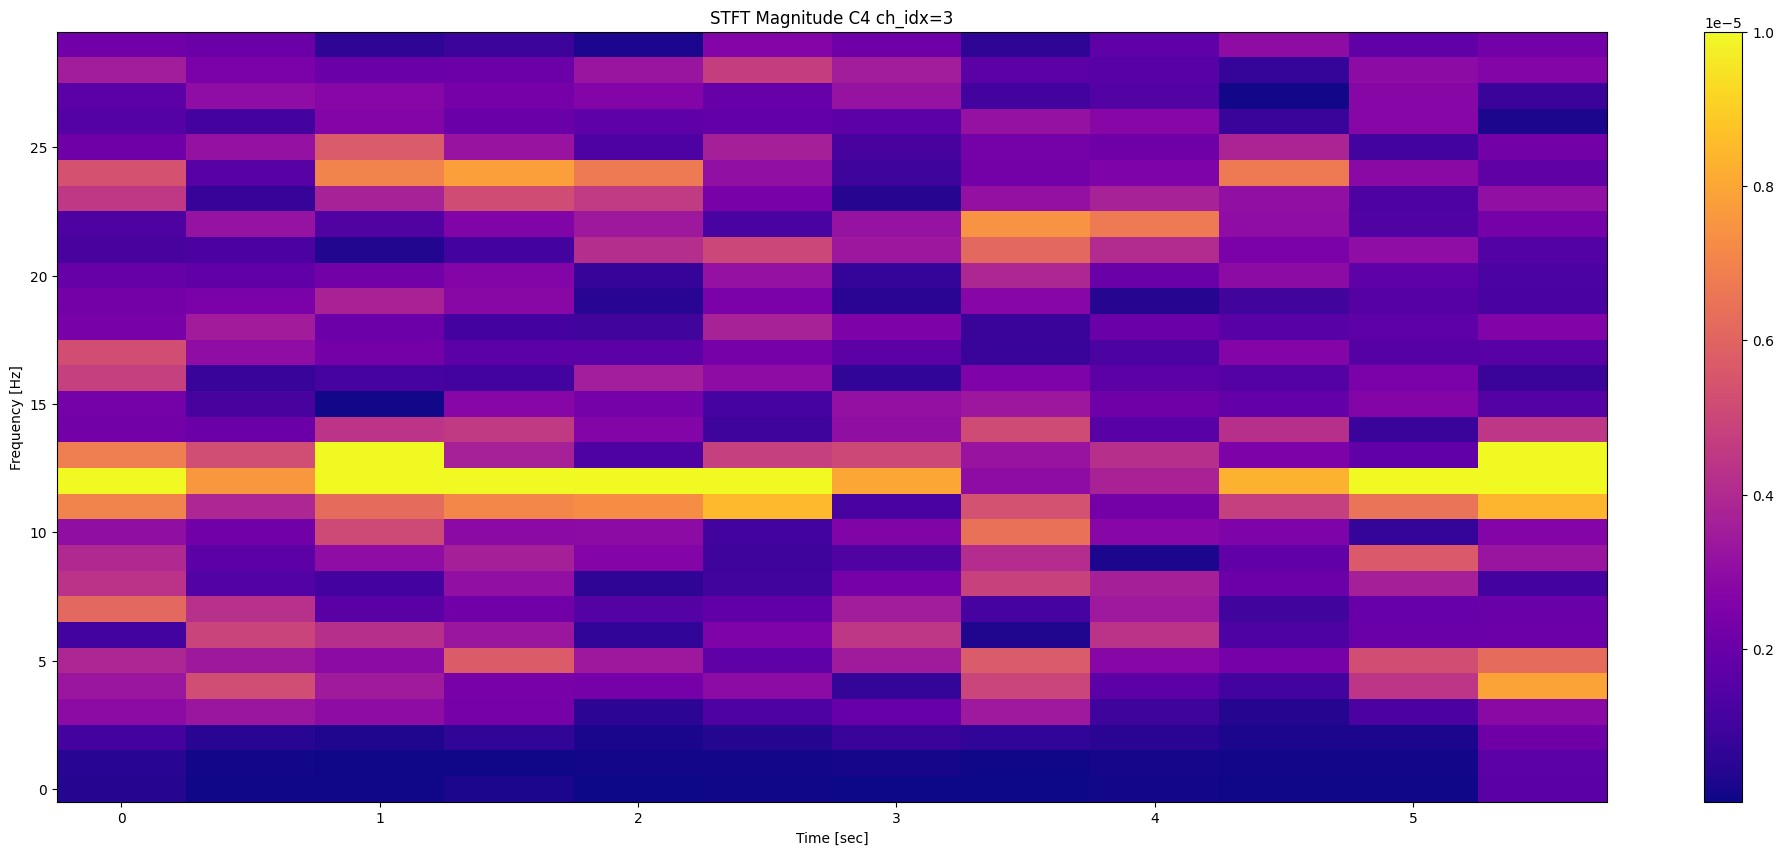

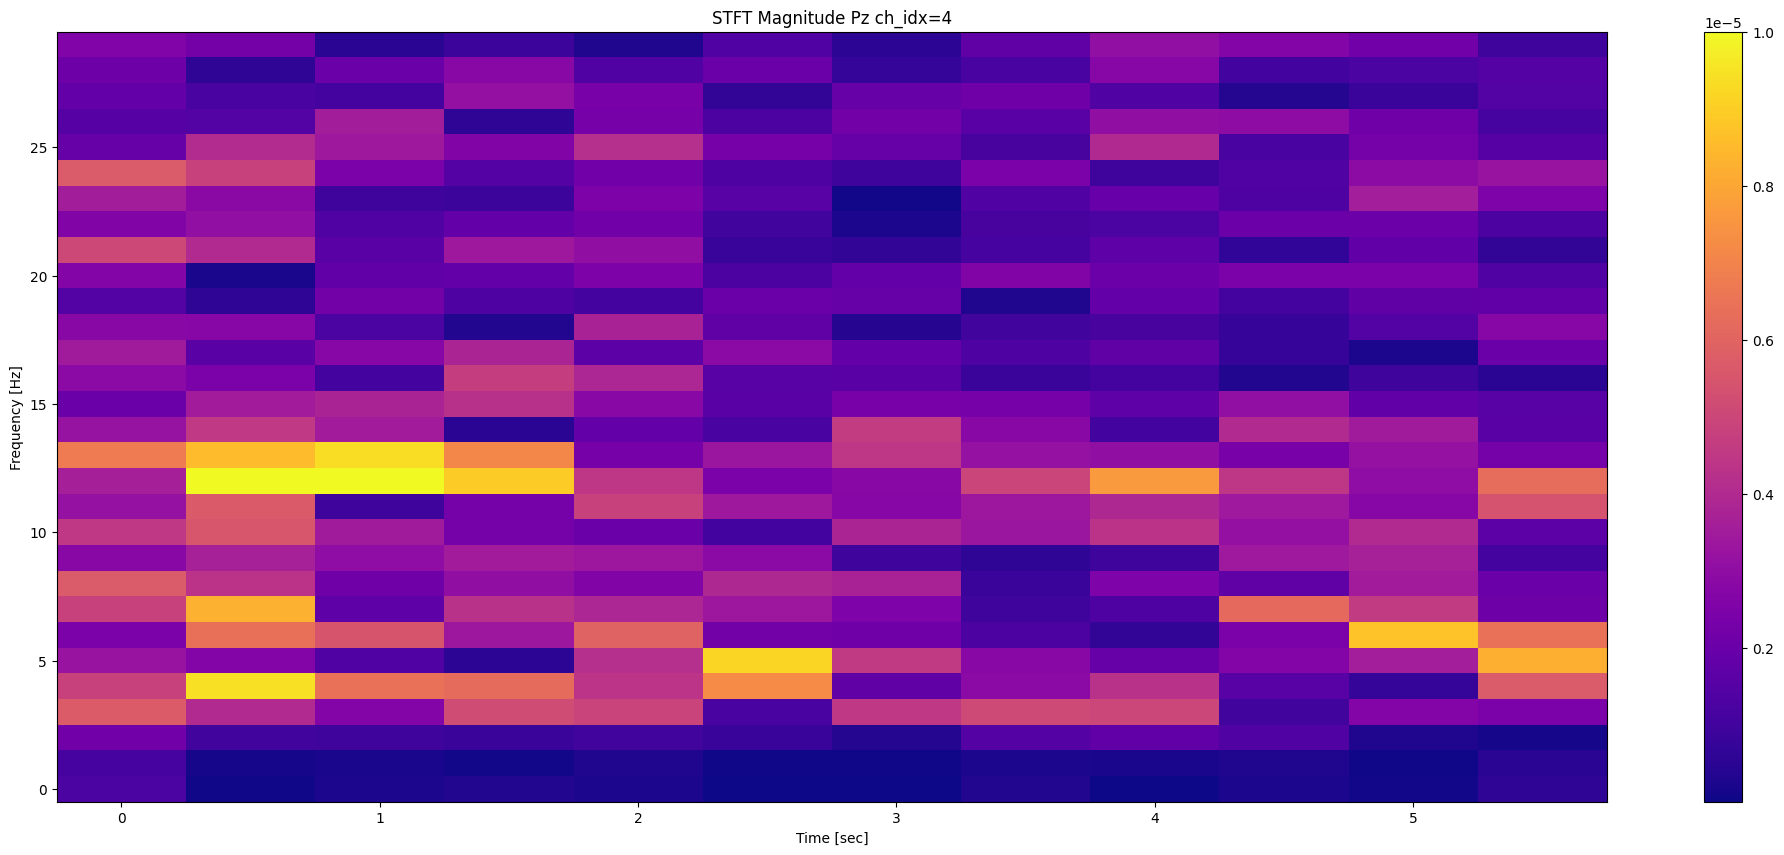

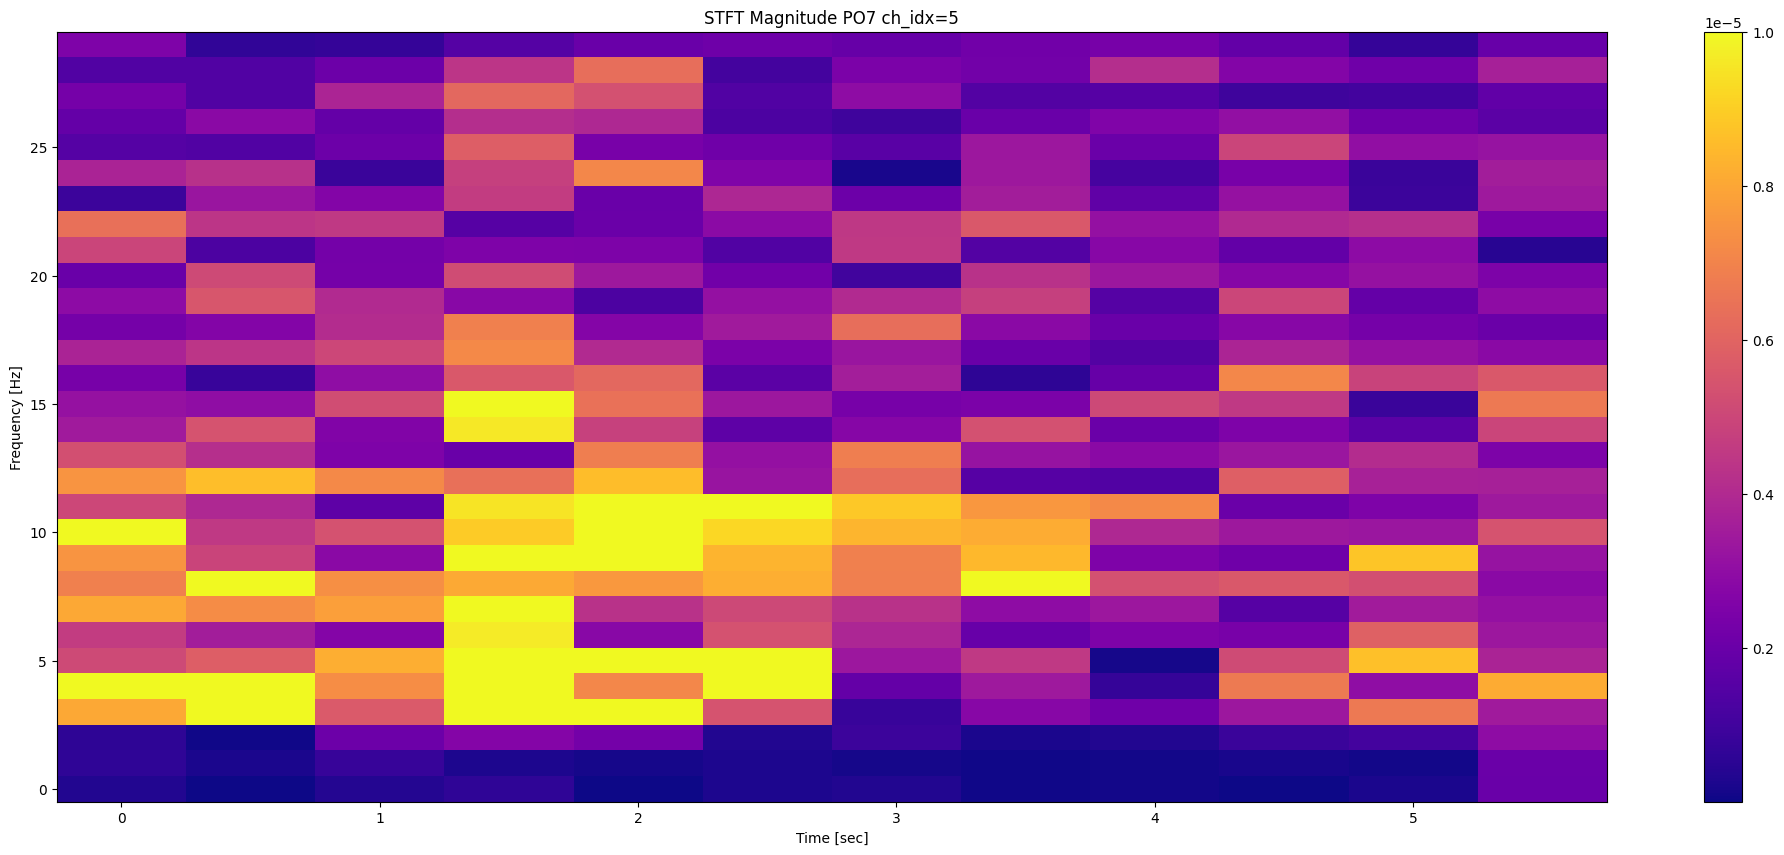

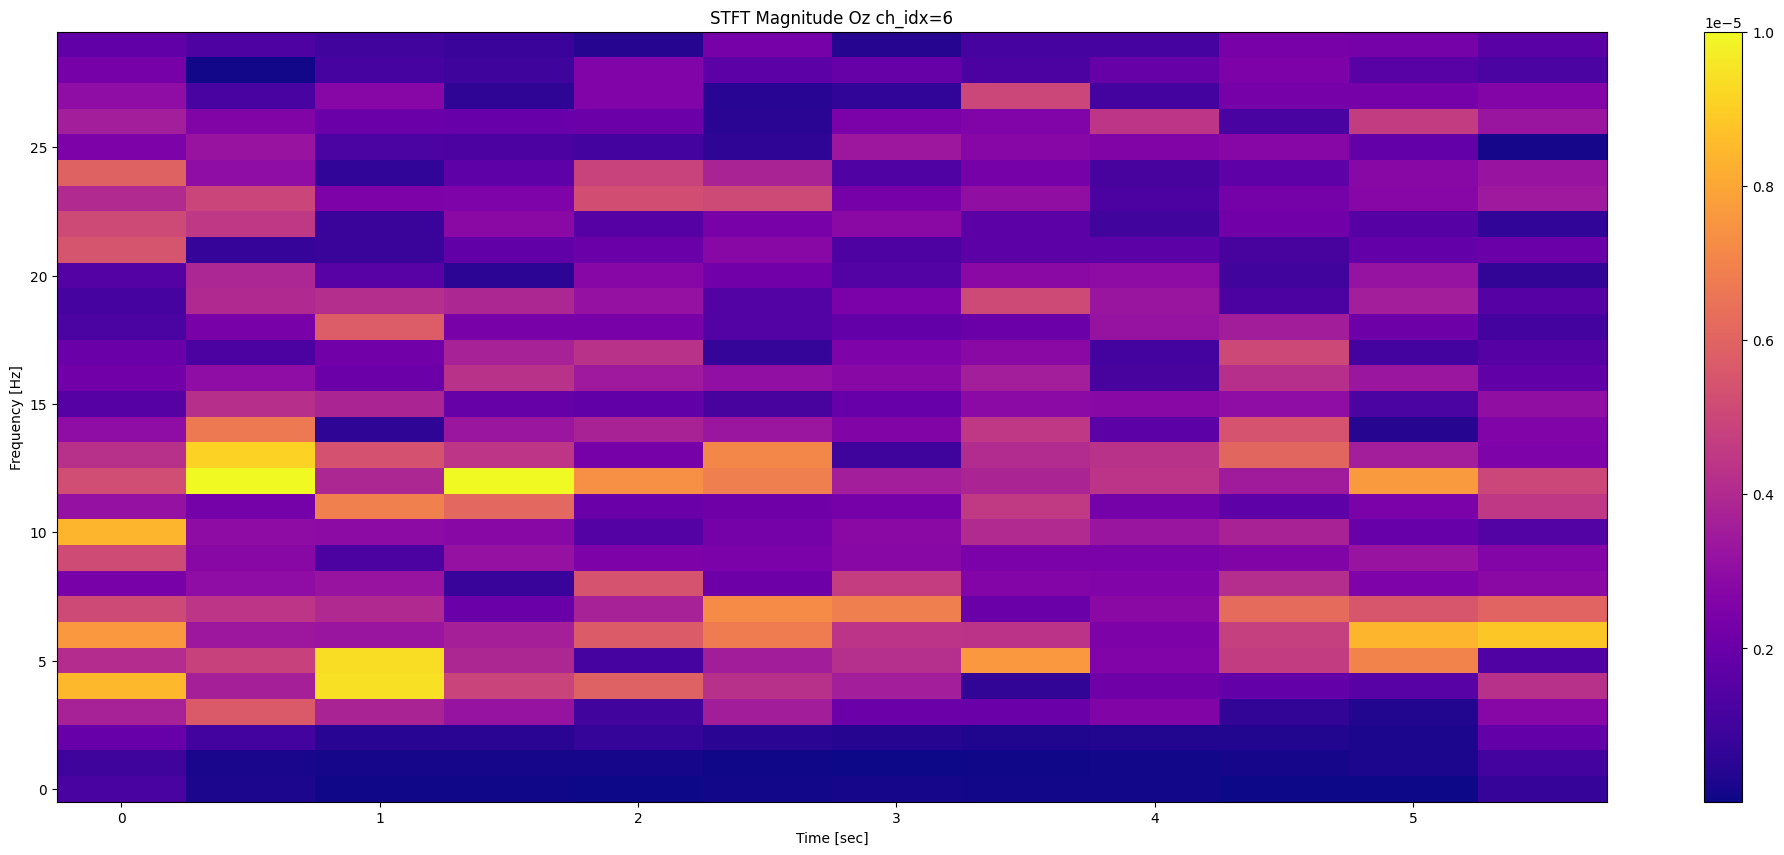

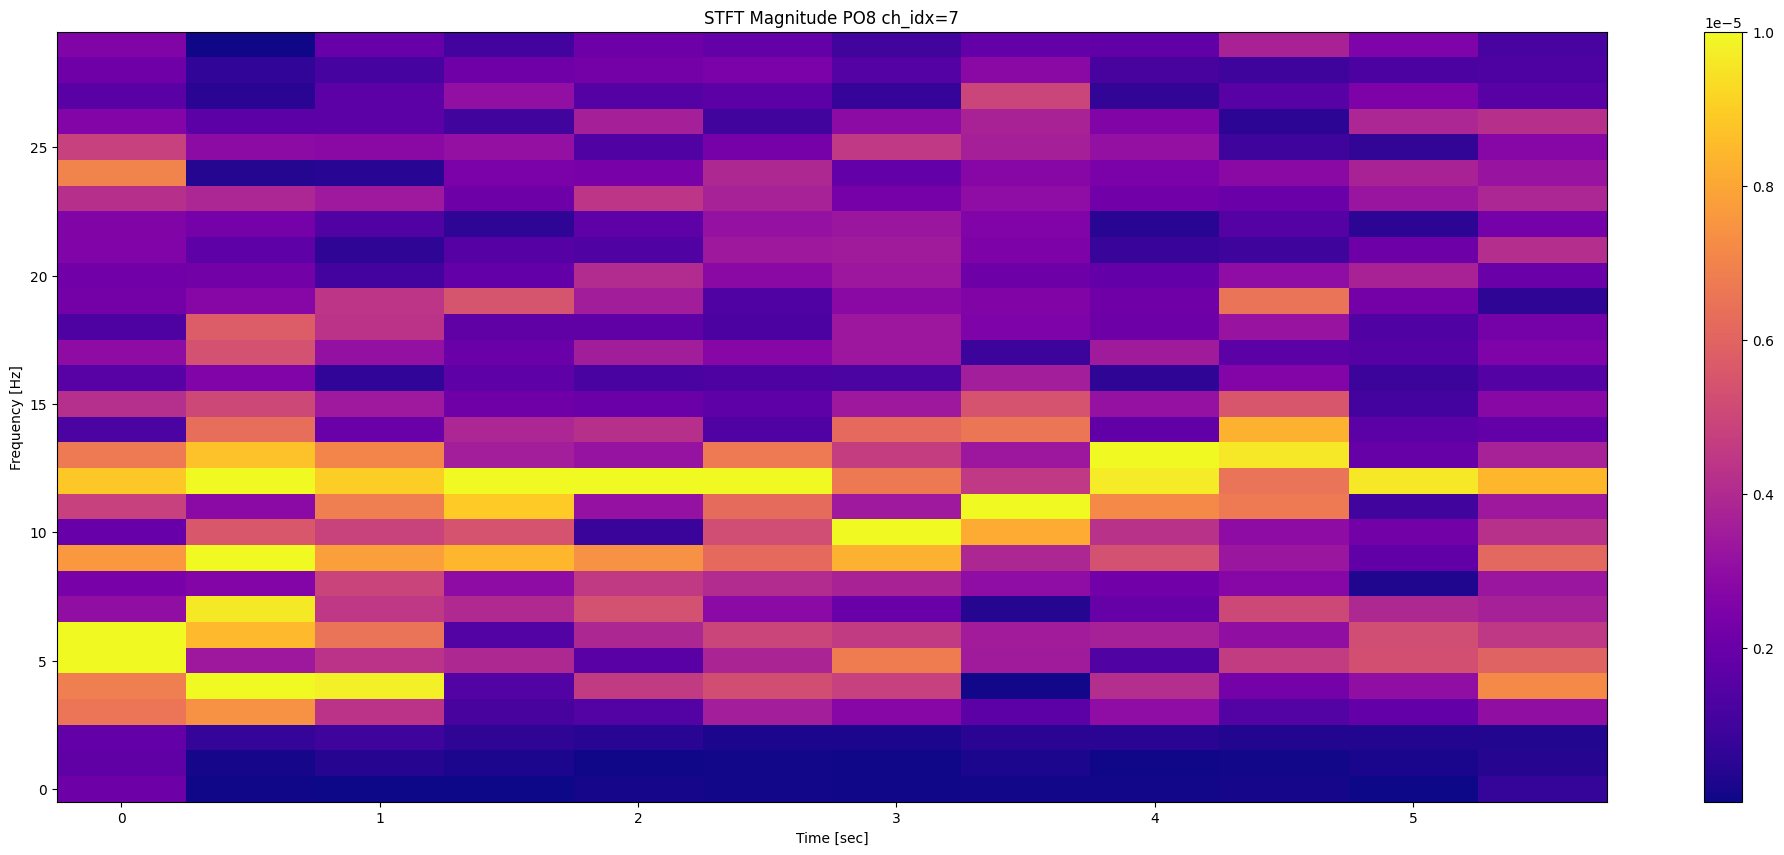

In [75]:
for ch_idx in range(1,8):
    stft = stft_data[0,ch_idx]
    stft = stft[:30,:]
    c = plt.pcolormesh(np.arange(0,(stft.shape[1]) //2,0.5), range(stft.shape[0]), np.abs(stft), cmap='plasma', vmax=10e-6)
    plt.colorbar(c)
    plt.title(f'STFT Magnitude {raw.ch_names[ch_idx]} {ch_idx=}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()